In [4]:
import random
from math import *
import operator
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas.plotting import parallel_coordinates

In [5]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\auto.csv"

In [7]:
# load the training data from iris.txt
df_auto = pd.read_csv(location)
                            

In [8]:
df_auto.shape

(397, 9)

In [9]:
df_auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
df_auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# MPG is a continuous variable, but to view the effect of of different 
# attributes on MPG in this case we would like it as a categorical variable.

# The horsepower feature has some missing values, denoted by the string '?'.
# As we want to represent this column numerically, we convert the question 
# marks to np.nan

In [24]:
df_auto['horsepower'] = pd.to_numeric(df_auto['horsepower'].replace('?', np.nan))

df_auto['mpg'] = pd.cut(df_auto['mpg'], [8, 16, 24, 32, 50])

In [25]:
# Pandas cut example
test = pd.DataFrame({'Number': [-10, -5, -1, 0,20,30,31,45,60]})

In [27]:
#30 value is in (0, 30] group
test['range1'] = pd.cut(test.Number, [-5, 0, 30, 60])

#30 value is in [30, 60) group
test['range2'] = pd.cut(test.Number, [-5, 0, 30, 60], include_lowest=True)

#30 value is in (0, 30] group
test['range3'] = pd.cut(test.Number, [-5, 0, 30, 60], right=False)

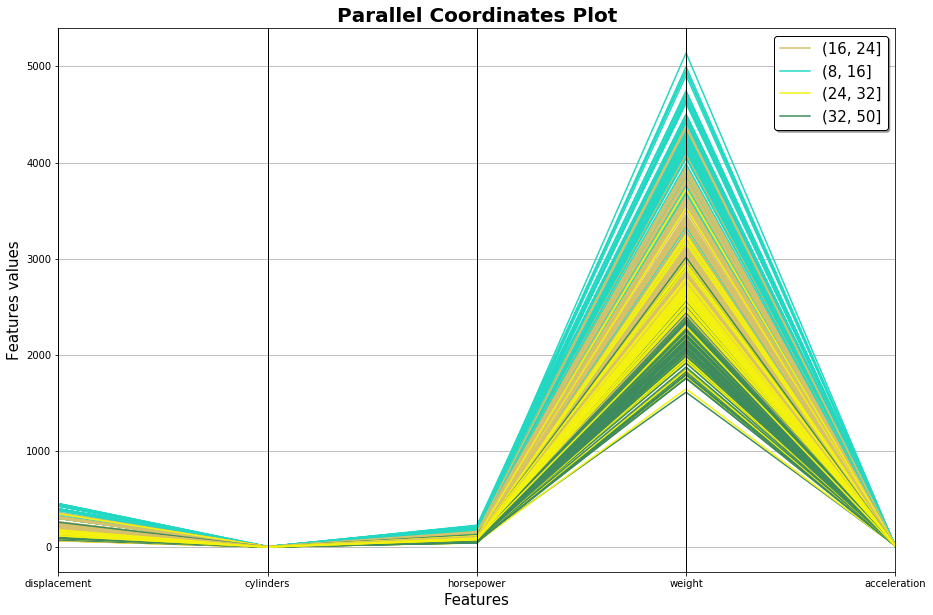

In [30]:
plt.figure(figsize=(15,10))

parallel_coordinates(
    df_auto[['mpg', 
             'displacement', 
             'cylinders', 
             'horsepower', 
             'weight', 
             'acceleration']], 'mpg')

plt.title('Mileage range wise parameters plot')
plt.ylabel('Damped oscillation')                     
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [ ]:
# scaling problems with this graph. It is difficult to glean any insight 
# due to the scale of the weight attribute overwhelming the other 
# attributes. 

# We could just normalise each of the columns, but then we lose information 
# on the values and range.
